In [1]:
import matplotlib.pyplot as plt # plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [25]:
column_names = ['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Day', 'Year','Month']

In [26]:
# ml_visual = pd.read_parquet('./Dataset/dataset_visualization.parquet', engine='pyarrow')
# # ml_dataset = spark.read.parquet("./Dataset/dataset_visualization.parquet")
# count = ml_visual.shape[0]
# print(count)

In [27]:
ml_visual = pd.read_csv("./Dataset/mapred_vis_data.csv",names=column_names)

In [28]:
ml_visual.dtypes

FL_DATE                 object
OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
WHEELS_OFF             float64
WHEELS_ON              float64
TAXI_IN                float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Day                      int64
Year                     int64
Month                    int64
dtype: object

In [30]:
ml_visual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5579410 entries, 1 to 5579410
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  DIVERTED             float64
 17  CRS_ELAPSED_TIME     float64
 18  ACTUAL_ELAPSED_TIME  float64
 19  AIR_TIME             float64
 20  DISTANCE             float64
 21  CARRIER_DELAY        float64
 22  WEATHER_DELAY        float64
 23  NAS_DELAY            float64
 24

In [32]:
ml_visual.isnull().sum()

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
Day                    0
Year                   0
Month                  0
dtype: int64

## Correlation between Features & Label:

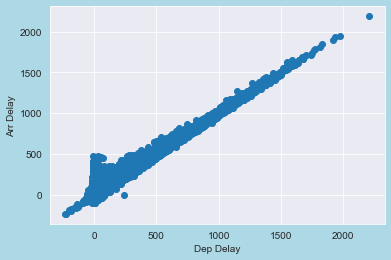

In [33]:
plt.scatter(ml_visual.DEP_DELAY , ml_visual.ARR_DELAY)
plt.xlabel('Dep Delay')
plt.ylabel('Arr Delay')
plt.show()

## Linear relation between Dep Delay and Arr Delay

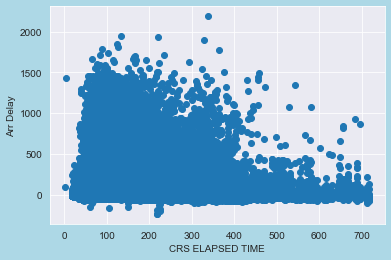

In [34]:
plt.scatter(ml_visual.CRS_ELAPSED_TIME , ml_visual.ARR_DELAY)
plt.xlabel('CRS ELAPSED TIME')
plt.ylabel('Arr Delay')
plt.show()

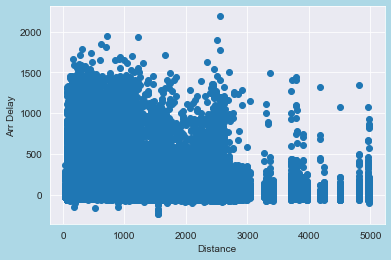

In [35]:
plt.scatter(ml_visual.DISTANCE , ml_visual.ARR_DELAY)
plt.xlabel('Distance')
plt.ylabel('Arr Delay')
plt.show()

## Delays is decresed with long distances

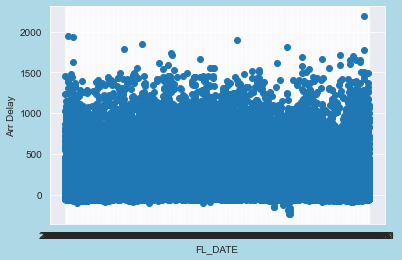

In [36]:
plt.scatter(ml_visual.FL_DATE , ml_visual.ARR_DELAY)
plt.xlabel('FL_DATE')
plt.ylabel('Arr Delay')
plt.show()

## Almost same distribution all over months/days

### Percent for each Carrier over all dataset:

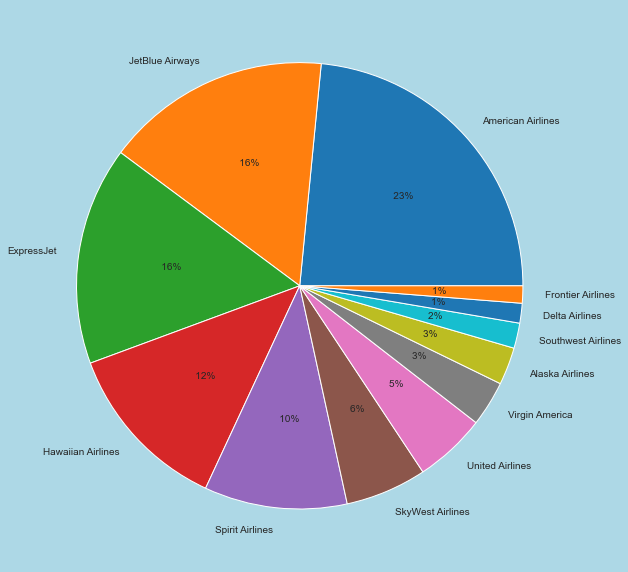

In [37]:
axis = plt.subplots(figsize=(10,14))
Name = ml_visual["OP_CARRIER"].unique()
size = ml_visual["OP_CARRIER"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

In [38]:
status = np.zeros(ml_visual.shape[0])
status[ml_visual["ARR_DELAY"] >0]=1

In [39]:
ml_visual['Status'] = status
ml_visual.Status.value_counts(normalize=True)

## As seen no values for Cancelled flights

0.0    0.651478
1.0    0.348522
Name: Status, dtype: float64

In [40]:
def status_data_distribution(data):
    case_count = ml_visual['Status'].value_counts()
    print('Legend:')
    print(case_count)
    plt.figure(figsize=(10,6))
    sns.barplot(x=case_count.index, y=case_count.values)
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.title('Data Distribution', fontsize=16)
    plt.xlabel('Flight Status', fontsize=12)
    plt.ylabel('Number of Flights', fontsize=12)
    plt.xticks(range(len(case_count.index)), ['ON TIME(0)', 'DELAYED(1)'])
    plt.show()

Legend:
0.0    3634863
1.0    1944547
Name: Status, dtype: int64


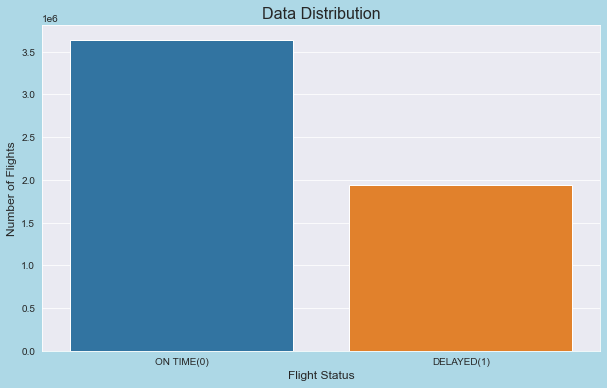

In [41]:
# check On-time / Delay data distribution
status_data_distribution(ml_visual)

In [42]:
ml_visual['flight_name'] = ml_visual['OP_CARRIER'].astype('category')
ml_visual['Month'] = ml_visual['Month'].astype('category')

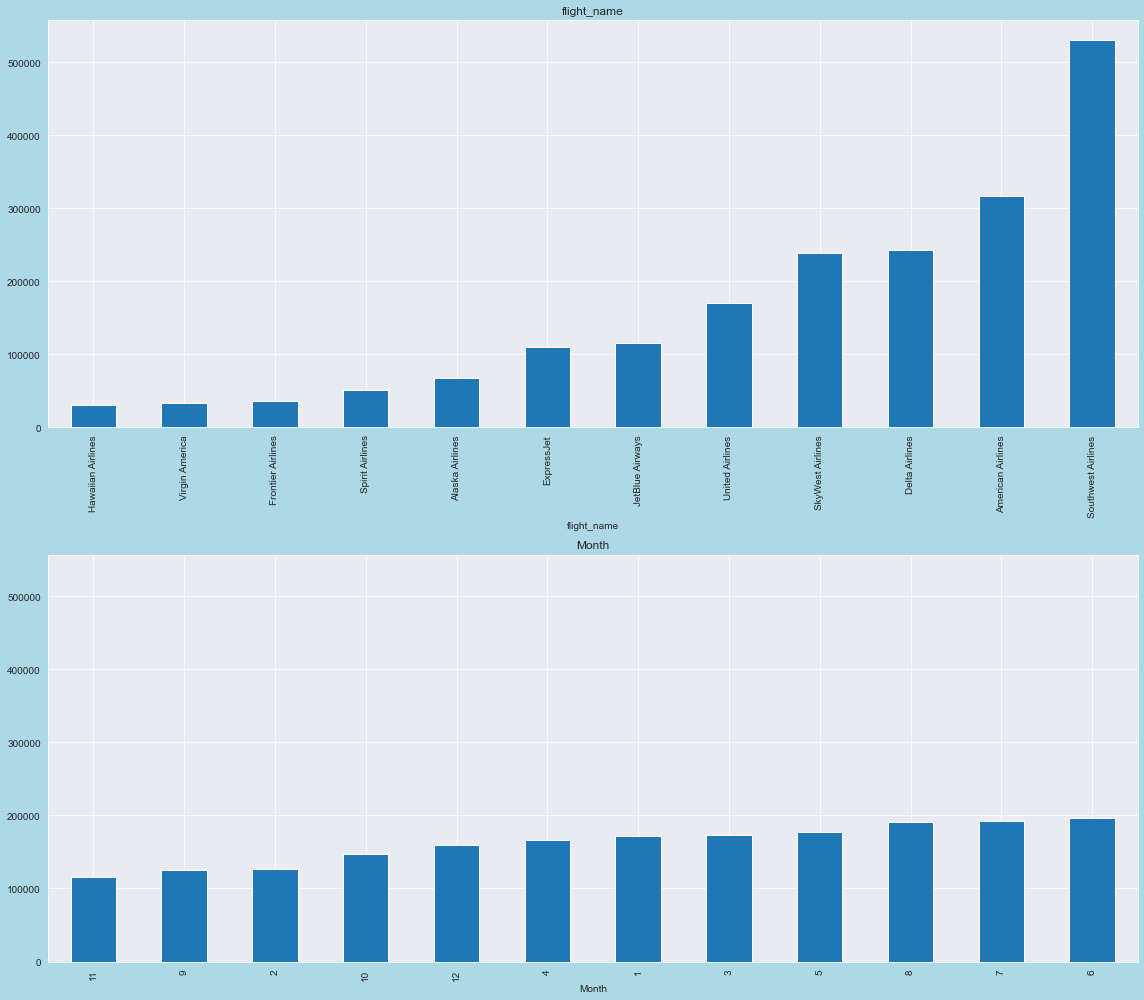

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,14), sharey=True)

categoricals = ['flight_name','Month']

for col, ax in zip(categoricals, axes.flatten()):
    (ml_visual.groupby(col).sum()['Status'].sort_values().plot.bar(ax=ax))
    
    ax.set_title(col)
    
fig.tight_layout()

## Show most Airports having delays (Arrival , Departure , etc)

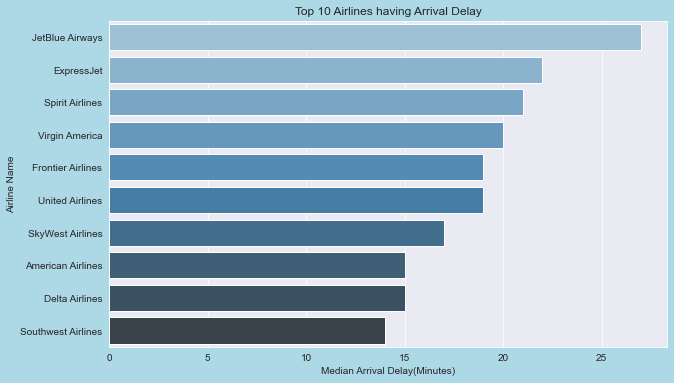

In [44]:
airline_arr = ml_visual[ml_visual['ARR_DELAY']>0]
airline_arr = airline_arr[['flight_name','ARR_DELAY']]
airline_arr = airline_arr.groupby(['flight_name'])['ARR_DELAY'].median().reset_index()
airline_arr = airline_arr.sort_values(by='ARR_DELAY', ascending=False, na_position='first').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='ARR_DELAY', 
            y='flight_name', 
            data=airline_arr, 
            order=airline_arr.sort_values('ARR_DELAY',ascending = False).flight_name,
           palette="Blues_d")
plt.ylabel('Airline Name')
plt.xlabel('Median Arrival Delay(Minutes)')
plt.title('Top 10 Airlines having Arrival Delay')
plt.show()

          flight_name  DEP_DELAY
3          ExpressJet       29.0
6     JetBlue Airways       26.0
7    SkyWest Airlines       24.0
9     Spirit Airlines       23.0
11     Virgin America       22.0
4   Frontier Airlines       19.0
10    United Airlines       16.0
1   American Airlines       15.0
0     Alaska Airlines       13.0
2      Delta Airlines       13.0


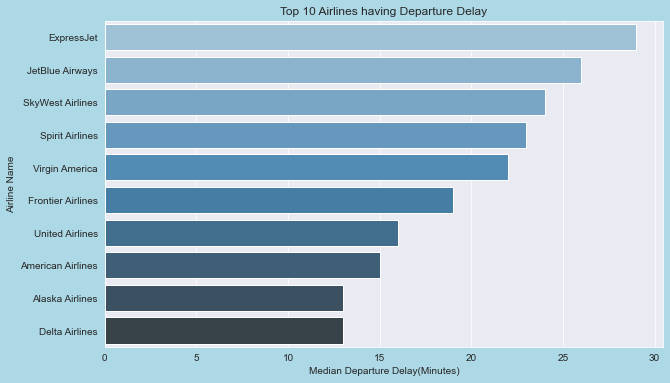

In [72]:
airline_dept = ml_visual[ml_visual['DEP_DELAY']>0]
airline_dept = airline_dept[['flight_name','DEP_DELAY']]
airline_dept = airline_dept.groupby(['flight_name'])['DEP_DELAY'].median().reset_index()
airline_dept = airline_dept.sort_values(by='DEP_DELAY', ascending=False, na_position='first').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='DEP_DELAY', 
            y="flight_name", 
            data=airline_dept, 
            order=airline_dept.sort_values('DEP_DELAY',ascending = False).flight_name,
           palette="Blues_d")
plt.ylabel('Airline Name')
plt.xlabel('Median Departure Delay(Minutes)')
plt.title('Top 10 Airlines having Departure Delay')
plt.show()

## 

In [47]:
ml_visual


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Day,Year,Month,Status,flight_name
1,2017-01-01,American Airlines,1,JFK,LAX,800,831.0,31.0,25.0,856.0,1143.0,26.0,1142,1209.0,27.0,0.0,0.0,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,1,2017,1,1.0,American Airlines
2,2017-01-01,American Airlines,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,1757.0,12.0,1727,1809.0,42.0,0.0,0.0,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,1,2017,1,1.0,American Airlines
3,2017-01-01,American Airlines,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,2025.0,15.0,1958,2040.0,42.0,0.0,0.0,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,1,2017,1,1.0,American Airlines
4,2017-01-01,American Airlines,5,DFW,HNL,1135,1252.0,77.0,19.0,1311.0,1744.0,5.0,1612,1749.0,97.0,0.0,0.0,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,1,2017,1,1.0,American Airlines
5,2017-01-01,American Airlines,6,OGG,DFW,1855,1855.0,0.0,16.0,1911.0,631.0,11.0,600,642.0,42.0,0.0,0.0,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,1,2017,1,1.0,American Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5579406,2017-12-31,United Airlines,2421,IAH,LAS,750,744.0,-6.0,14.0,758.0,849.0,4.0,916,853.0,-23.0,0.0,0.0,206.0,189.0,171.0,1222.0,0.0,0.0,0.0,0.0,0.0,31,2017,12,0.0,United Airlines
5579407,2017-12-31,United Airlines,2425,RSW,ORD,1611,1602.0,-9.0,12.0,1614.0,1753.0,12.0,1821,1805.0,-16.0,0.0,0.0,190.0,183.0,159.0,1120.0,0.0,0.0,0.0,0.0,0.0,31,2017,12,0.0,United Airlines
5579408,2017-12-31,United Airlines,2426,SNA,DEN,1335,1334.0,-1.0,9.0,1343.0,1627.0,10.0,1649,1637.0,-12.0,0.0,0.0,134.0,123.0,104.0,846.0,0.0,0.0,0.0,0.0,0.0,31,2017,12,0.0,United Airlines
5579409,2017-12-31,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1224.0,15.0,1254,1239.0,-15.0,0.0,0.0,99.0,92.0,66.0,414.0,0.0,0.0,0.0,0.0,0.0,31,2017,12,0.0,United Airlines


In [79]:
airline_distance = ml_visual[['flight_name','DISTANCE']]
airline_distance = round(airline_distance.groupby(['flight_name'])["DISTANCE"].sum().reset_index(),ndigits=2)
airline_distance=airline_distance.sort_values(by='DISTANCE', ascending=False, na_position='first').head(10)
airline_distance['DISTANCE'] = airline_distance['DISTANCE']/1000000
print(airline_distance)

           flight_name    DISTANCE
8   Southwest Airlines  976.121953
1    American Airlines  903.223711
2       Delta Airlines  796.359229
10     United Airlines  684.960083
7     SkyWest Airlines  326.221334
6      JetBlue Airways  302.435246
0      Alaska Airlines  228.737704
9      Spirit Airlines  152.417361
3           ExpressJet  151.548791
4    Frontier Airlines  111.132403


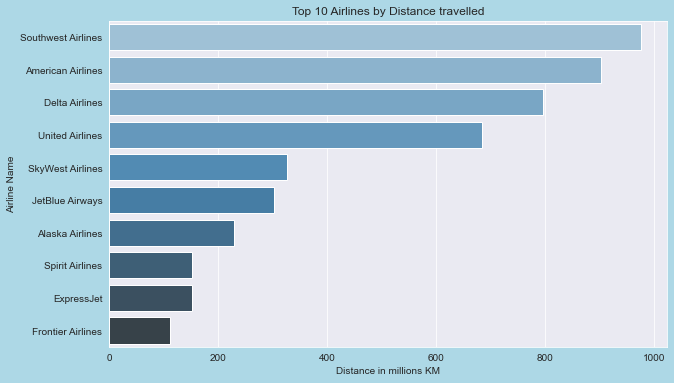

In [84]:
plt.figure(figsize=(10,6))
sns.barplot(x='DISTANCE', 
            y="flight_name", 
            data=airline_distance, 
            order=airline_distance.sort_values('DISTANCE',ascending = False).flight_name,
           palette="Blues_d")
plt.ylabel('Airline Name')
plt.xlabel('Distance in millions KM')
plt.title('Top 10 Airlines by Distance travelled')
plt.show()

In [125]:
airport_origin = ml_visual['ORIGIN'].unique()
airport_origin_counts = ml_visual['ORIGIN'].value_counts().head(10)

In [126]:
airport_origin_counts

ATL    358537
ORD    262074
DEN    221148
LAX    211730
DFW    178967
SFO    170943
PHX    153378
LAS    150132
SEA    136020
MSP    133470
Name: ORIGIN, dtype: int64

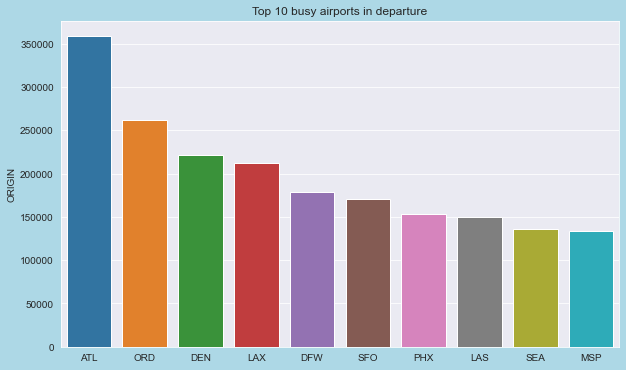

In [127]:
plt.figure(figsize=(10,6))
sns.barplot(x=airport_origin_counts.index,y=airport_origin_counts)
plt.title("Top 10 busy airports in departure")
plt.show()

In [128]:
airport_origin = ml_visual['DEST'].unique()
airport_origin_counts = ml_visual['DEST'].value_counts().head(10)

In [129]:
airport_origin_counts

ATL    358263
ORD    261800
DEN    221280
LAX    211786
DFW    178608
SFO    170824
PHX    153160
LAS    150221
SEA    135918
MSP    133579
Name: DEST, dtype: int64

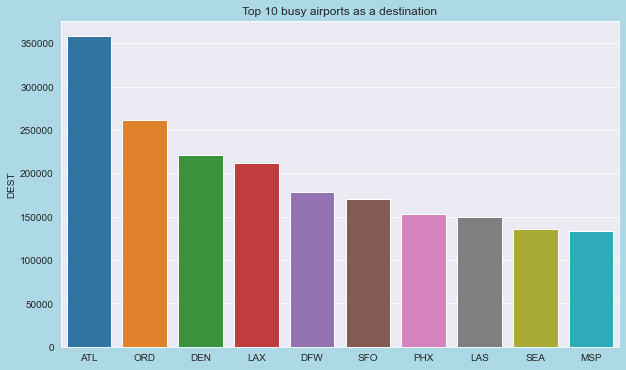

In [130]:
plt.figure(figsize=(10,6))
sns.barplot(x=airport_origin_counts.index,y=airport_origin_counts)
plt.title("Top 10 busy airports as a destination")
plt.show()